In [1]:
import numpy as np
import os
import pandas as pd
from scipy.stats import linregress

In [2]:
class UnsupervisedEmbeddingQualityEvaluation:
    
    @staticmethod
    def RankMe(M, epsilon=1e-7):
        # Perform Singular Value Decomposition (SVD)
        U, Sigma, Vt = np.linalg.svd(M, full_matrices=False)
        
        # Normalize the singular values
        pk = Sigma / (np.sum(Sigma) + epsilon)
        
        # Compute the minimum of the number of rows and columns
        min_dim = min(M.shape)
        
        # Compute the Shannon entropy over the minimum dimension
        entropy = -np.sum(pk[:min_dim] * np.log(pk[:min_dim] + epsilon))
        
        # Compute the RankMe value
        rankme_value = np.exp(entropy)
        
        return rankme_value

    @staticmethod
    def NESum(M):
        C = np.cov(M, rowvar=False)
        Lambda, U = np.linalg.eig(C)
        idx = np.argsort(Lambda)[::-1]
        Lambda = Lambda[idx]
        U = U[:, idx]
        n = min(C.shape)
        NESum = np.sum([Lambda[i] / (Lambda[0]) for i in range(n)])
        return NESum
    
    @staticmethod
    def Stable_rank(M):
        fro_norm = np.linalg.norm(M, 'fro')
        two_norm = np.linalg.norm(M,2) # The largest singular value
        numerical_rank = fro_norm**2 / two_norm**2
        return numerical_rank
    

In [3]:
# Define the path to the folders
base_path = '/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork'
folders = ['DNA_BERT2', 'HyenaDNA', 'mistral','nucleotide-transformer-500m-human-ref']

In [4]:
# Dictionary to store matrices
matrices = {}

# Read and store matrices
for folder in folders:
    #print(folder)
    folder_path = os.path.join(base_path, folder)
    for file_name in os.listdir(folder_path):
        print(file_name)
        if file_name.endswith('.npy'):
            file_path = os.path.join(folder_path, file_name)
            if folder == 'nucleotide-transformer-500m-human-ref':
                emb_file =  np.load(file_path)
                matrices[file_name] = np.matrix(emb_file) 
            else:
                emb_file =  np.load(file_path,allow_pickle=True)
                matrices[file_name] = np.vstack(np.array(emb_file))

In [5]:
evaluator = UnsupervisedEmbeddingQualityEvaluation()

#Prepare DataFrame to store results
results = []

# Calculate metrics for each matrix
for file_name, matrix in matrices.items():
    print(file_name)
    rank = evaluator.RankMe(matrix)
    nesum = evaluator.NESum(matrix)
    stable_rank = evaluator.Stable_rank(matrix)
    
    results.append({
        "File": file_name.replace('.npy', ''),
        "RankMe": rank,
        "NESum": nesum,
        "Stable_rank": stable_rank
        
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [7]:
results_df

,File,RankMe,NESum,Stable_rank
0,test_demo_coding_vs_intergenomic_seqs_DB2_Embe...,417.606506,3.645811,1.275535
1,test_human_enhancers_cohn_DB2_Embeddings,312.855011,1.638011,1.215953
2,test_human_enhancers_ensembl_DB2_Embeddings,410.557159,2.738051,1.435890
3,test_human_ensembl_regulatory_DB2_Embeddings,361.772156,2.195628,1.253837
4,test_human_nontata_promoters_DB2_Embeddings,361.934143,3.741728,1.187584
5,test_human_ocr_ensembl_DB2_Embeddings,393.304688,2.166240,1.295467
6,train_demo_coding_vs_intergenomic_seqs_DB2_Emb...,419.046112,3.675846,1.271834
7,train_human_enhancers_cohn_DB2_Embeddings,318.471710,1.646767,1.213043
8,train_human_enhancers_ensembl_DB2_Embeddings,412.878876,2.719255,1.435668
9,train_human_ensembl_regulatory_DB2_Embeddings,362.948273,2.207182,1.242775


In [8]:
tst = results_df

In [9]:
results_df['File'] = results_df['File'].str.replace('coding_vs_intergenomic', 'codingIntergenomic', regex=False)

In [10]:
results_df['Dataset'] = results_df['File'].apply(lambda x: x.split('_')[0])
results_df['Sequence_Type'] = results_df['File'].apply(lambda x: '_'.join(x.split('_')[1:4]))
results_df['Model'] = results_df['File'].apply(lambda x: '_'.join(x.split('_')[4:]))

In [11]:
results_df

,File,RankMe,NESum,Stable_rank,Dataset,Sequence_Type,Model
0,test_demo_codingIntergenomic_seqs_DB2_Embeddings,417.606506,3.645811,1.275535,test,demo_codingIntergenomic_seqs,DB2_Embeddings
1,test_human_enhancers_cohn_DB2_Embeddings,312.855011,1.638011,1.215953,test,human_enhancers_cohn,DB2_Embeddings
2,test_human_enhancers_ensembl_DB2_Embeddings,410.557159,2.738051,1.435890,test,human_enhancers_ensembl,DB2_Embeddings
3,test_human_ensembl_regulatory_DB2_Embeddings,361.772156,2.195628,1.253837,test,human_ensembl_regulatory,DB2_Embeddings
4,test_human_nontata_promoters_DB2_Embeddings,361.934143,3.741728,1.187584,test,human_nontata_promoters,DB2_Embeddings
5,test_human_ocr_ensembl_DB2_Embeddings,393.304688,2.166240,1.295467,test,human_ocr_ensembl,DB2_Embeddings
6,train_demo_codingIntergenomic_seqs_DB2_Embeddings,419.046112,3.675846,1.271834,train,demo_codingIntergenomic_seqs,DB2_Embeddings
7,train_human_enhancers_cohn_DB2_Embeddings,318.471710,1.646767,1.213043,train,human_enhancers_cohn,DB2_Embeddings
8,train_human_enhancers_ensembl_DB2_Embeddings,412.878876,2.719255,1.435668,train,human_enhancers_ensembl,DB2_Embeddings
9,train_human_ensembl_regulatory_DB2_Embeddings,362.948273,2.207182,1.242775,train,human_ensembl_regulatory,DB2_Embeddings


In [12]:
filter_key = ['codingIntergenomic', 'human_enhancers_cohn', 'human_enhancers_ensembl', 'human_nontata_promoters']

# Filter the DataFrame based on the 'File' column containing any of the filter keys
filtered_df = results_df[results_df['File'].str.contains('|'.join(filter_key))]
filtered_df.shape

(32, 7)

In [13]:
# from scipy.stats import spearmanr


# # Function to calculate column-wise Spearman correlation
# def calculate_correlation(matrix):
#     correlation_matrix, _ = spearmanr(matrix, axis=0)
#     return correlation_matrix

# # Function to calculate mean and standard deviation of the upper triangle of the correlation matrix
# def mean_sd_upper_triangle(correlation_matrix):
#     # Get the upper triangle indices, excluding the diagonal
#     upper_triangle_indices = np.triu_indices_from(correlation_matrix, k=1)
#     upper_triangle_values = correlation_matrix[upper_triangle_indices]
#     mean_value = np.mean(upper_triangle_values)
#     sd_value = np.std(upper_triangle_values)
#     return mean_value, sd_value

# # Calculate metrics for each matrix
# for file_name, matrix in matrices.items():
#     print(file_name)
#     correlation_matrix = calculate_correlation(matrix)
#     mean_value, sd_value = mean_sd_upper_triangle(correlation_matrix)
#     print(f"Mean of upper triangle Spearman correlations: {mean_value:.4f}")
#     print(f"Standard deviation of upper triangle Spearman correlations: {sd_value:.4f}")
#     print()


In [14]:
filtered_df.to_csv('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/embedding_quality_evaluation.csv', index=False)

In [16]:
## Plots ## 

In [15]:
df = pd.read_csv('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/embedding_quality_evaluation.csv')

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.columns

Index(['File', 'RankMe', 'NESum', 'Stable_rank', 'Dataset', 'Sequence_Type',
       'Model'],
      dtype='object')

In [18]:
del df['File']

In [19]:
df

,RankMe,NESum,Stable_rank,Dataset,Sequence_Type,Model
0,417.606506,3.645811,1.275535,test,demo_codingIntergenomic_seqs,DB2_Embeddings
1,312.855011,1.638011,1.215953,test,human_enhancers_cohn,DB2_Embeddings
2,410.557159,2.738051,1.435890,test,human_enhancers_ensembl,DB2_Embeddings
3,361.934143,3.741728,1.187584,test,human_nontata_promoters,DB2_Embeddings
4,419.046112,3.675846,1.271834,train,demo_codingIntergenomic_seqs,DB2_Embeddings
5,318.471710,1.646767,1.213043,train,human_enhancers_cohn,DB2_Embeddings
6,412.878876,2.719255,1.435668,train,human_enhancers_ensembl,DB2_Embeddings
7,367.337311,3.755783,1.189370,train,human_nontata_promoters,DB2_Embeddings
8,19.325193,2.174946,1.016662,test,demo_codingIntergenomic_seqs,HD_Embeddings
9,16.372709,2.646894,1.013371,test,human_enhancers_cohn,HD_Embeddings


In [20]:
# Calculating mean values for each group
mean_values = df.groupby(['Sequence_Type', 'Model']).mean().reset_index()

In [21]:
mean_values

,Sequence_Type,Model,RankMe,NESum,Stable_rank
0,demo_codingIntergenomic_seqs,DB2_Embeddings,418.326309,3.660828,1.273684
1,demo_codingIntergenomic_seqs,HD_Embeddings,19.316176,2.177900,1.016565
2,demo_codingIntergenomic_seqs,NT_Embeddings,525.442625,5.357300,1.106745
3,demo_codingIntergenomic_seqs,mistral_Embeddings,90.149563,2.740337,1.102807
4,human_enhancers_cohn,DB2_Embeddings,315.663361,1.642389,1.214498
5,human_enhancers_cohn,HD_Embeddings,16.479902,2.657878,1.013242
6,human_enhancers_cohn,NT_Embeddings,369.044385,5.160476,1.054091
7,human_enhancers_cohn,mistral_Embeddings,96.386127,4.007423,1.129994
8,human_enhancers_ensembl,DB2_Embeddings,411.718018,2.728653,1.435779
9,human_enhancers_ensembl,HD_Embeddings,22.049845,2.166344,1.028042


In [22]:
#np.savez('/mnt/vstor/SOM_EPBI_XXZ10/raghav/Unsupervised_Evaluation_LLM/PaperWork/allEmbedding_matrices.npz', **matrices)

In [23]:
metrics = ['RankMe', 'NESum', 'Stable_rank']

In [24]:
models_to_filter = ['DB2_Embeddings', 'HD_Embeddings', 'mistral_Embeddings','NT_Embeddings']
filtered_mean_values = mean_values[mean_values['Model'].isin(models_to_filter)]

In [25]:
filtered_mean_values

,Sequence_Type,Model,RankMe,NESum,Stable_rank
0,demo_codingIntergenomic_seqs,DB2_Embeddings,418.326309,3.660828,1.273684
1,demo_codingIntergenomic_seqs,HD_Embeddings,19.316176,2.177900,1.016565
2,demo_codingIntergenomic_seqs,NT_Embeddings,525.442625,5.357300,1.106745
3,demo_codingIntergenomic_seqs,mistral_Embeddings,90.149563,2.740337,1.102807
4,human_enhancers_cohn,DB2_Embeddings,315.663361,1.642389,1.214498
5,human_enhancers_cohn,HD_Embeddings,16.479902,2.657878,1.013242
6,human_enhancers_cohn,NT_Embeddings,369.044385,5.160476,1.054091
7,human_enhancers_cohn,mistral_Embeddings,96.386127,4.007423,1.129994
8,human_enhancers_ensembl,DB2_Embeddings,411.718018,2.728653,1.435779
9,human_enhancers_ensembl,HD_Embeddings,22.049845,2.166344,1.028042


/tmp/job.1712284.hpc/ipykernel_61424/1530858811.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_mean_values, x='Sequence_Type', y=metric, hue='Model', ci=None)


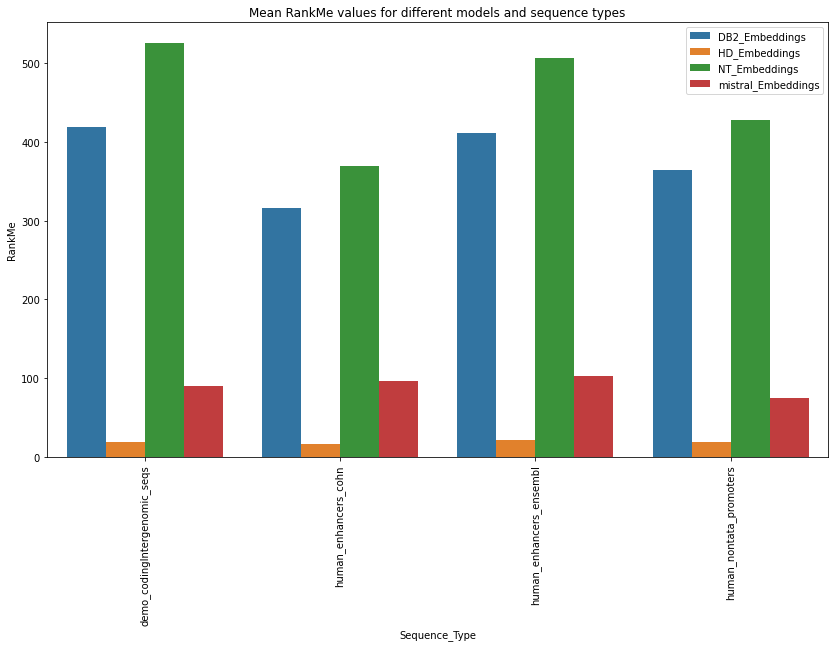

/tmp/job.1712284.hpc/ipykernel_61424/1530858811.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_mean_values, x='Sequence_Type', y=metric, hue='Model', ci=None)


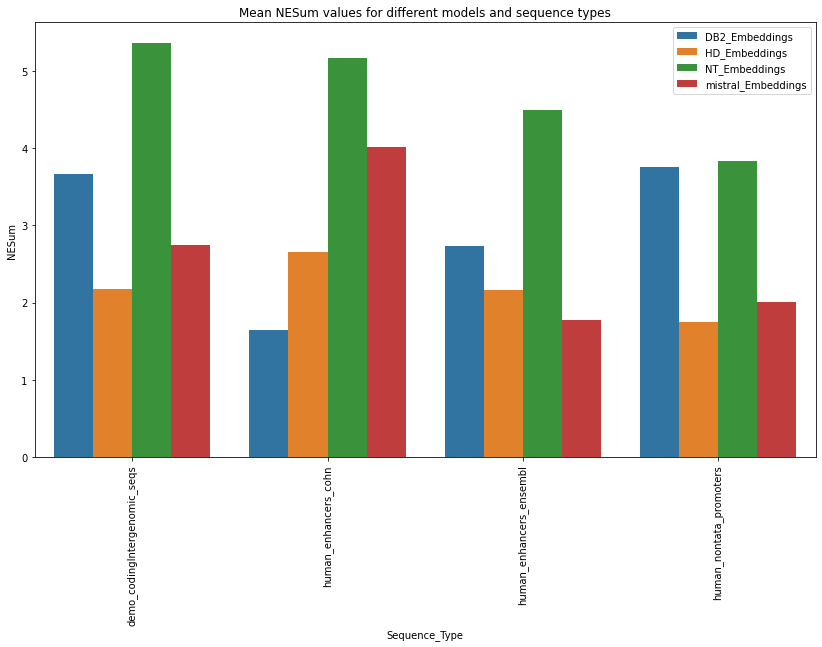

/tmp/job.1712284.hpc/ipykernel_61424/1530858811.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_mean_values, x='Sequence_Type', y=metric, hue='Model', ci=None)


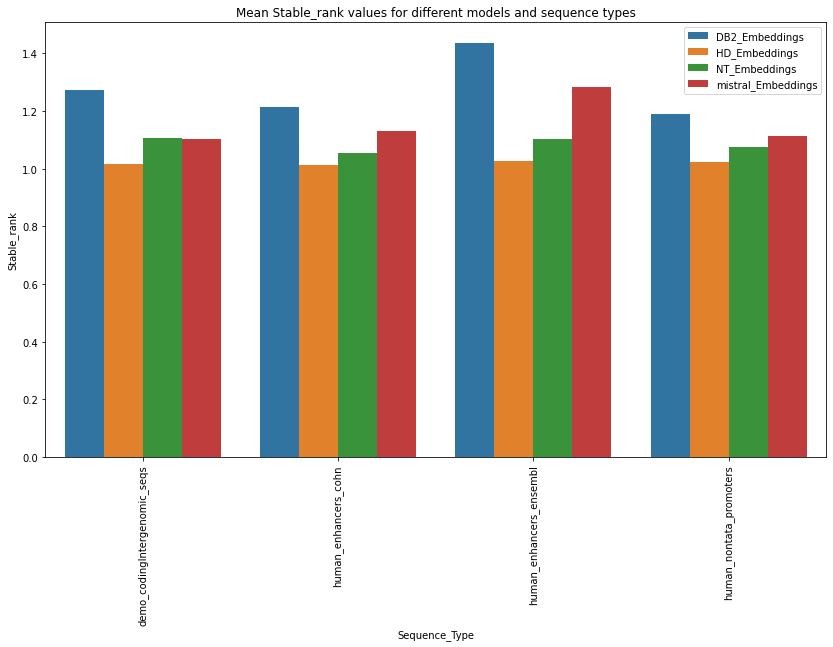

In [26]:
%matplotlib inline

for metric in metrics:
    plt.figure(figsize=(14, 8))
    sns.barplot(data=filtered_mean_values, x='Sequence_Type', y=metric, hue='Model', ci=None)
    plt.title(f'Mean {metric} values for different models and sequence types')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()


In [32]:
#filtered_mean_values['Stable_rank'] = filtered_mean_values['Stable_rank']*1000

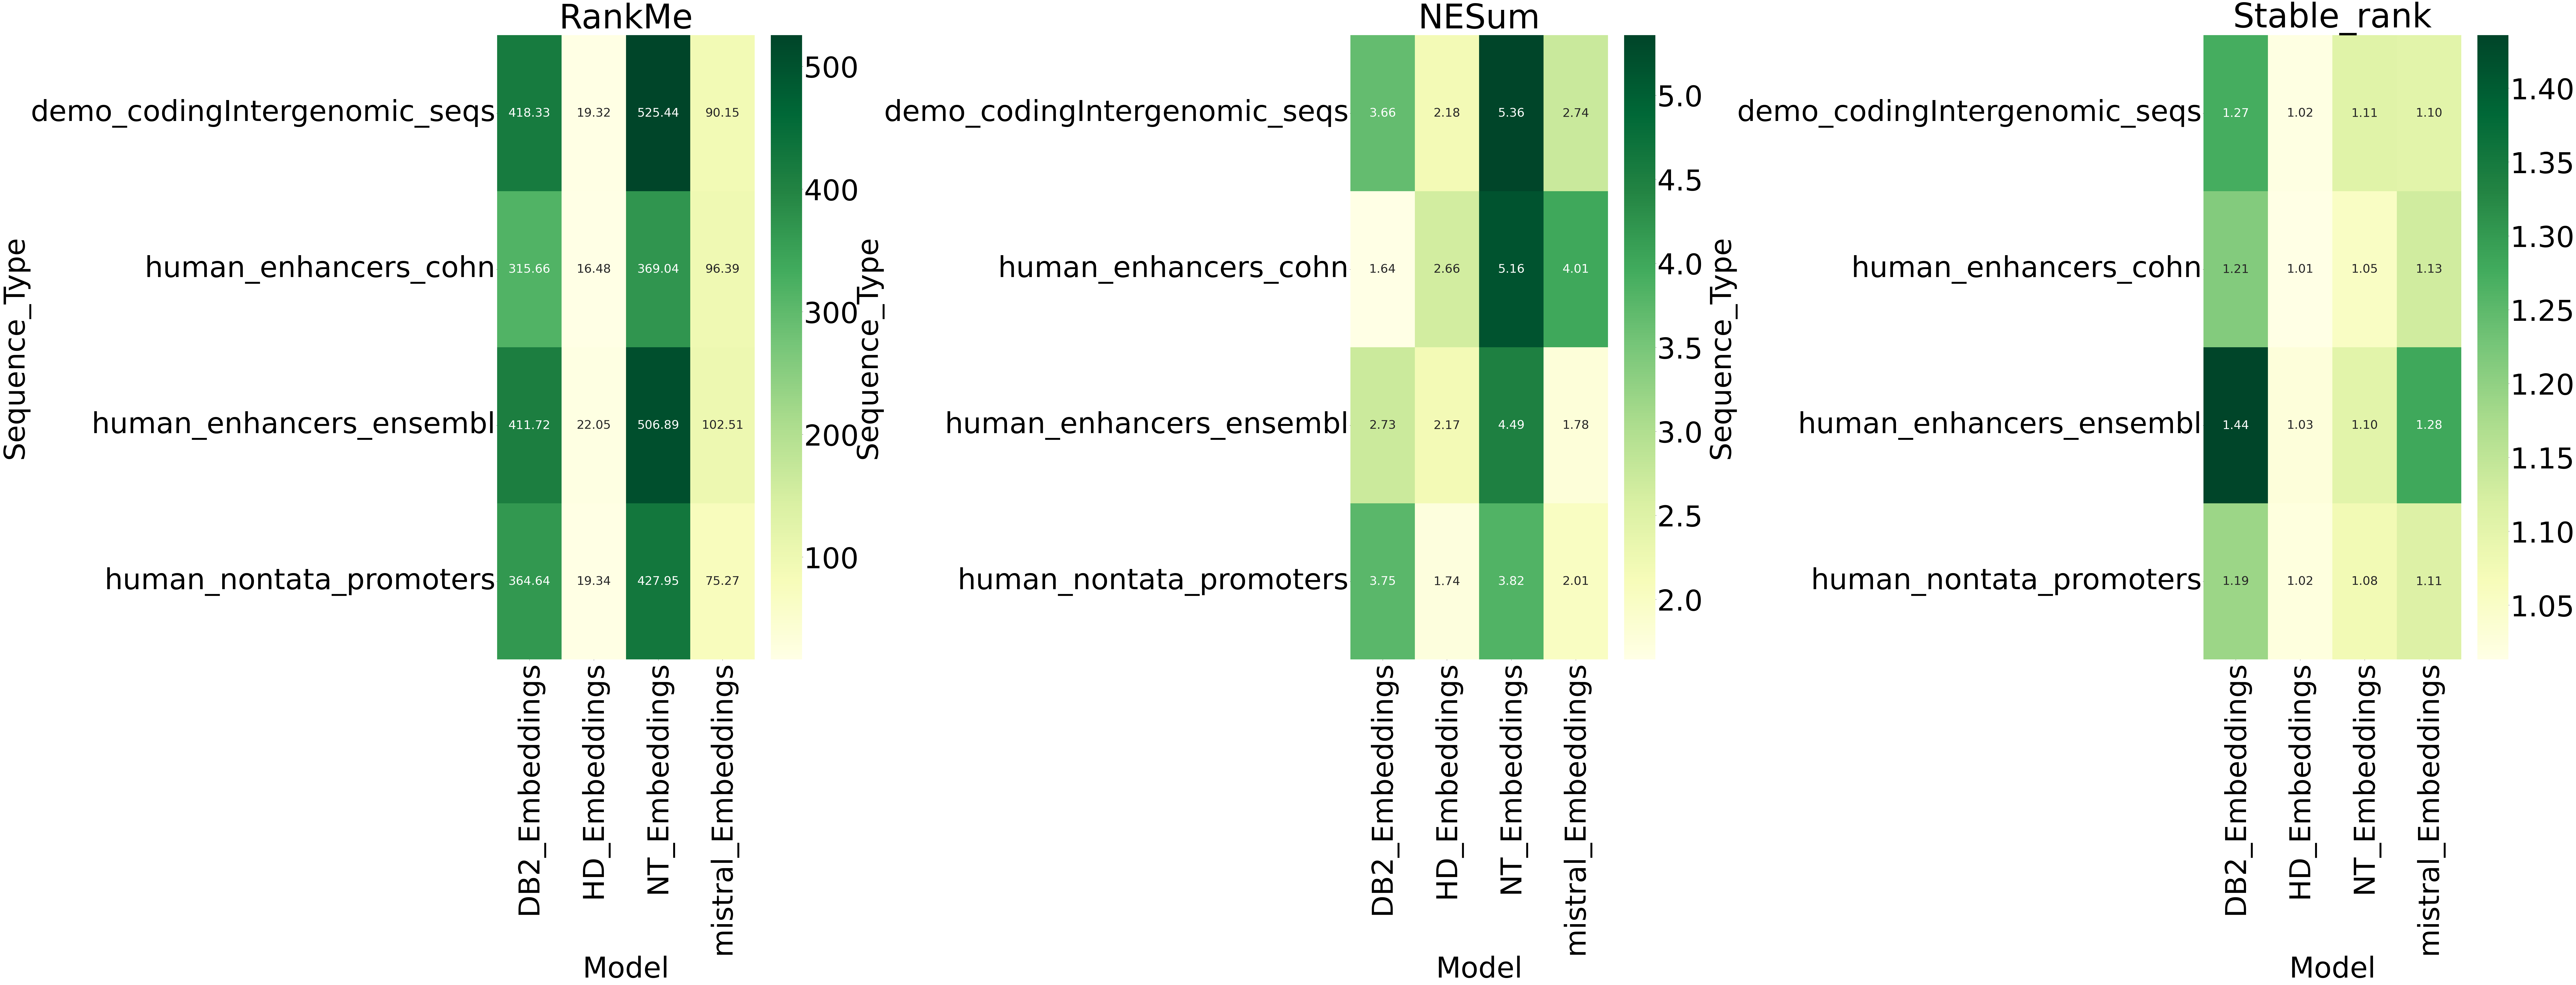

In [27]:
%matplotlib inline

# Set global font size
plt.rcParams.update({'font.size': 110, 'axes.titlesize': 140, 'axes.labelsize': 120, 'xtick.labelsize': 120, 'ytick.labelsize': 120, 'legend.fontsize': 120})

# Assuming 'metrics' and 'filtered_mean_values' are already defined
fig, axes = plt.subplots(1, 3, figsize=(150, 60))  # Adjusting figsize to fit the grid

for ax, metric in zip(axes, metrics):
    heatmap_data = filtered_mean_values.pivot_table(values=metric, index='Sequence_Type', columns='Model')
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGn', annot_kws={"size": 50}, ax=ax)
    ax.set_title(f'{metric}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.savefig('/home/rxa615/UnsupervisedEvaluation_PaperFigure/Result2/UnsupervisedScore.pdf')
plt.show()

In [30]:
# fig, axes = plt.subplots(2, 3, figsize=(30, 30))
# sequence_types = filtered_mean_values['Sequence_Type'].unique()
# heatmap_data = filtered_mean_values.pivot_table(index=['Sequence_Type', 'Model'], values=['RankMe', 'NESum', 'Stable_rank'])

# for i, sequence_type in enumerate(sequence_types):
#     ax = axes[i // 3, i % 3]  # Adjust indexing for 2 rows and 3 columns
#     sub_data = heatmap_data.loc[sequence_type]
   
#     sns.heatmap(sub_data.T, annot=True, fmt='.2f', cmap='BuGn', ax=ax, cbar=(i == 0), annot_kws={"size": 15})
#     ax.set_title(sequence_type, fontsize=40)
    
#     # Modify x-axis labels
#     model_labels = [label.replace('_Embeddings', '') for label in sub_data.index.get_level_values('Model')]
#     ax.set_xticklabels(model_labels, fontsize=25)
    
#     ax.set_xlabel('Model', fontsize=30)
#     ax.set_ylabel('Metric', fontsize=20)
#     ax.tick_params(axis='y', labelsize=25)

# fig.tight_layout()
# plt.show()



In [ ]:
# # Assuming mean_values dataframe is defined
# models_to_filter = ['NT_2.5b-1000g_Embeddings', 'NT_500m-human-ref_Embeddings', 'NT_500m-1000g_Embeddings']
# filtered_mean_values_NT = mean_values[mean_values['Model'].isin(models_to_filter)]

In [ ]:
# filtered_mean_values_NT

In [ ]:
# metrics = ['RankMe', 'NESum', 'Stable_rank']
# sequence_types = filtered_mean_values_NT['Sequence_Type'].unique()

# # Plotting
# fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 18), sharex=True)

# for idx, metric in enumerate(metrics):
#     ax = axes[idx]
#     x = np.arange(len(sequence_types))  # the label locations
#     width = 0.2  # the width of the bars

#     for i, model in enumerate(grouped['Model'].unique()):
#         model_data = grouped[grouped['Model'] == model]
#         ax.bar(x + i * width, model_data[metric], width, label=model)

#     ax.set_ylabel(metric)
#     ax.set_xticks(x + width * (len(grouped['Model'].unique()) - 1) / 2)
#     ax.set_xticklabels(sequence_types)
#     ax.legend()

# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()